In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=500)
train_input,val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2,random_state=42)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must sp

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)

In [3]:
from tensorflow import keras
model=keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 20ms/step - loss: 0.6925 - accuracy: 0.5594 - val_loss: 0.6920 - val_accuracy: 0.5878
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6908 - accuracy: 0.6181 - val_loss: 0.6895 - val_accuracy: 0.6362
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6864 - accuracy: 0.6610 - val_loss: 0.6826 - val_accuracy: 0.6772
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6657 - accuracy: 0.7030 - val_loss: 0.6382 - val_accuracy: 0.7110
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6162 - accuracy: 0.7055 - val_loss: 0.6072 - val_accuracy: 0.7060
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5913 - accuracy: 0.7237 - val_loss: 0.5866 - val_accuracy: 0.7260
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5699 - accuracy: 0.7407 - val_loss: 0.5667 - val_accuracy:

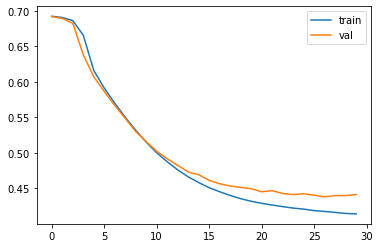

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [7]:
model2= keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [8]:
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history=model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 21ms/step - loss: 0.6928 - accuracy: 0.5183 - val_loss: 0.6925 - val_accuracy: 0.5340
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6912 - accuracy: 0.5664 - val_loss: 0.6906 - val_accuracy: 0.5696
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6880 - accuracy: 0.6031 - val_loss: 0.6865 - val_accuracy: 0.5904
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6805 - accuracy: 0.6405 - val_loss: 0.6758 - val_accuracy: 0.6306
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6598 - accuracy: 0.6928 - val_loss: 0.6426 - val_accuracy: 0.7274
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6206 - accuracy: 0.7308 - val_loss: 0.6079 - val_accuracy: 0.7258
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5937 - accuracy: 0.7303 - val_loss: 0.5861 - val_accuracy:

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show()